In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = [20, 20]

import numpy as np

In [5]:
data = pd.read_csv('clustering.csv',header=None)
data.columns = ['x','y']

Najpierw zobaczmy jak dane wyglądają bez klasteryzacij.



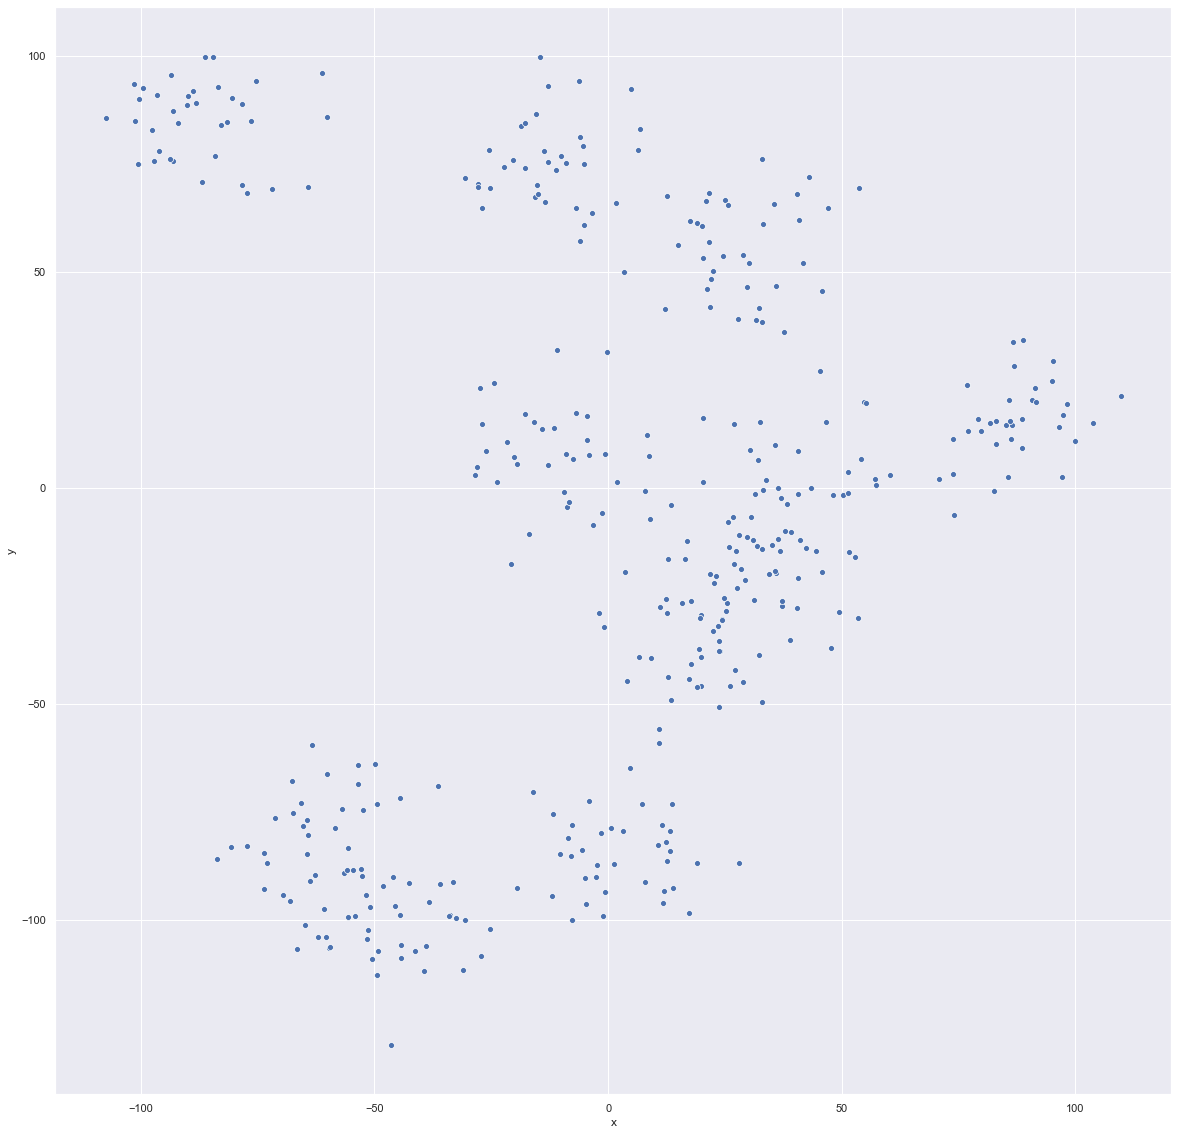

In [6]:


sns.scatterplot(x="x", y="y", data=data)

Dane wydają sie zawierać klastry jest ich między 5 a 8 zobaczymy jak sprawdzą się algorytmy przenaczone do klasteryzaji.

Metoda 1 KMeans
====
Jako sposób wyboru liczby klastrów wykorzystam metodę łokciową.

In [30]:

from sklearn.cluster import KMeans


def elbow_method(startk,endk,data):
    scores = []
    for i in range(startk,endk+1):
         scores.append(-KMeans(i,random_state=0).fit(data).score(data))
    
    # data 
    df = pd.DataFrame({'clusters':[i for i in range(startk,endk+1)],'scores':scores})
    #
    plt.plot(df.clusters, df.scores, 'bx-')
    plt.xlabel('Cluster')
    plt.ylabel('Scores')
    plt.title('Elbow Method')
    plt.xticks([i for i in range(startk,endk+1)])
    plt.show()

    

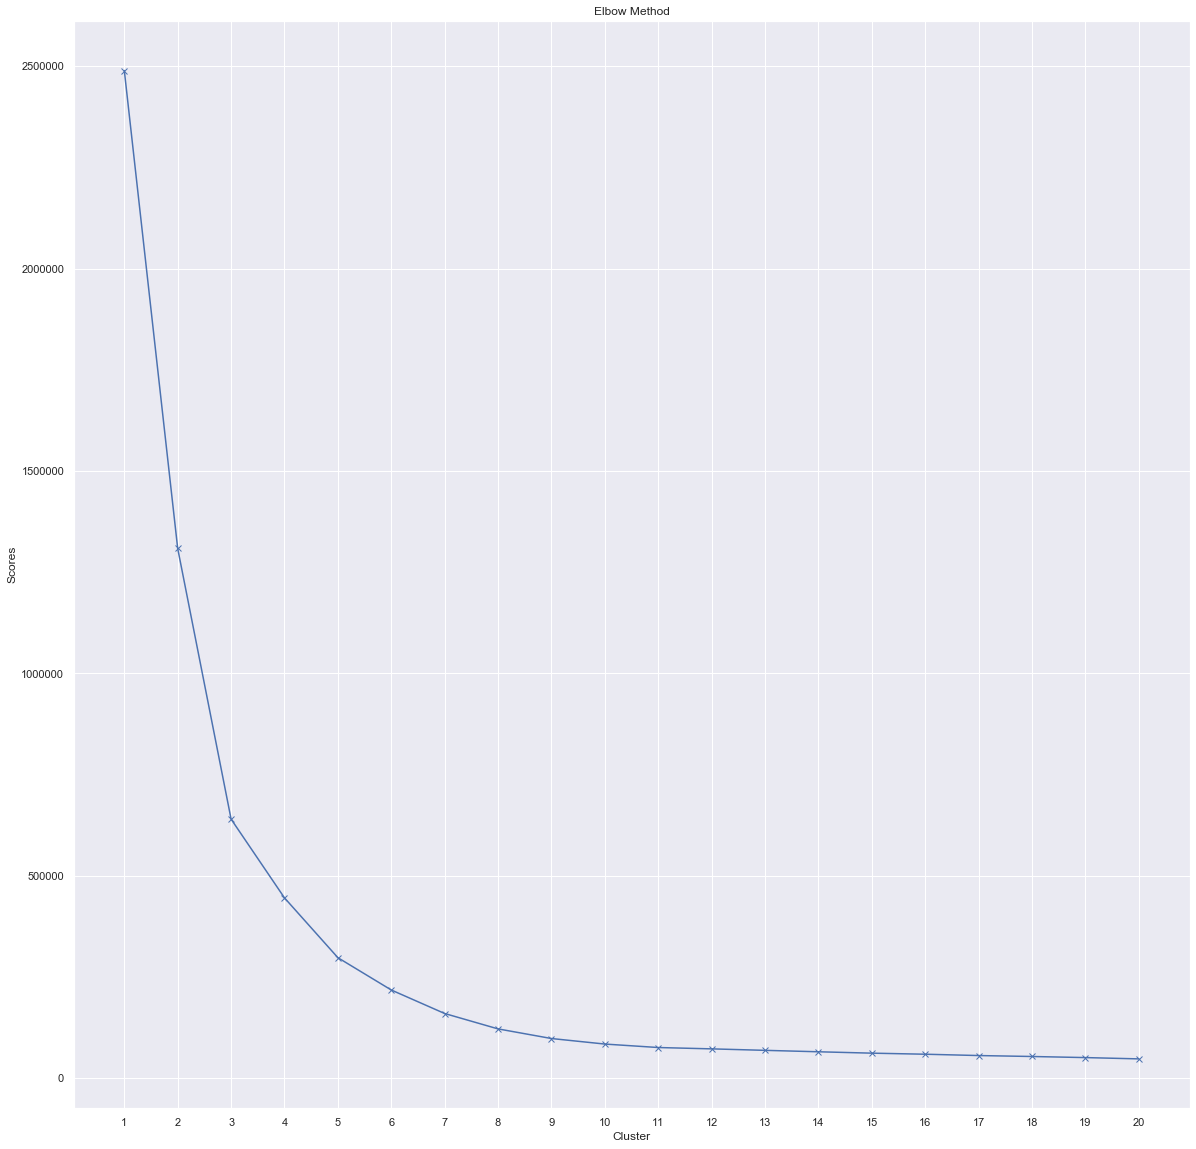

In [32]:
elbow_method(1,20,data)

Wykres nie daje jednoznacznego wyniku dla tego sprawdę dwie możliwe liczby klastrów 6 i 7. Równie dobrze można na przykład sprawdzić 5.

C:\Users\48501\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


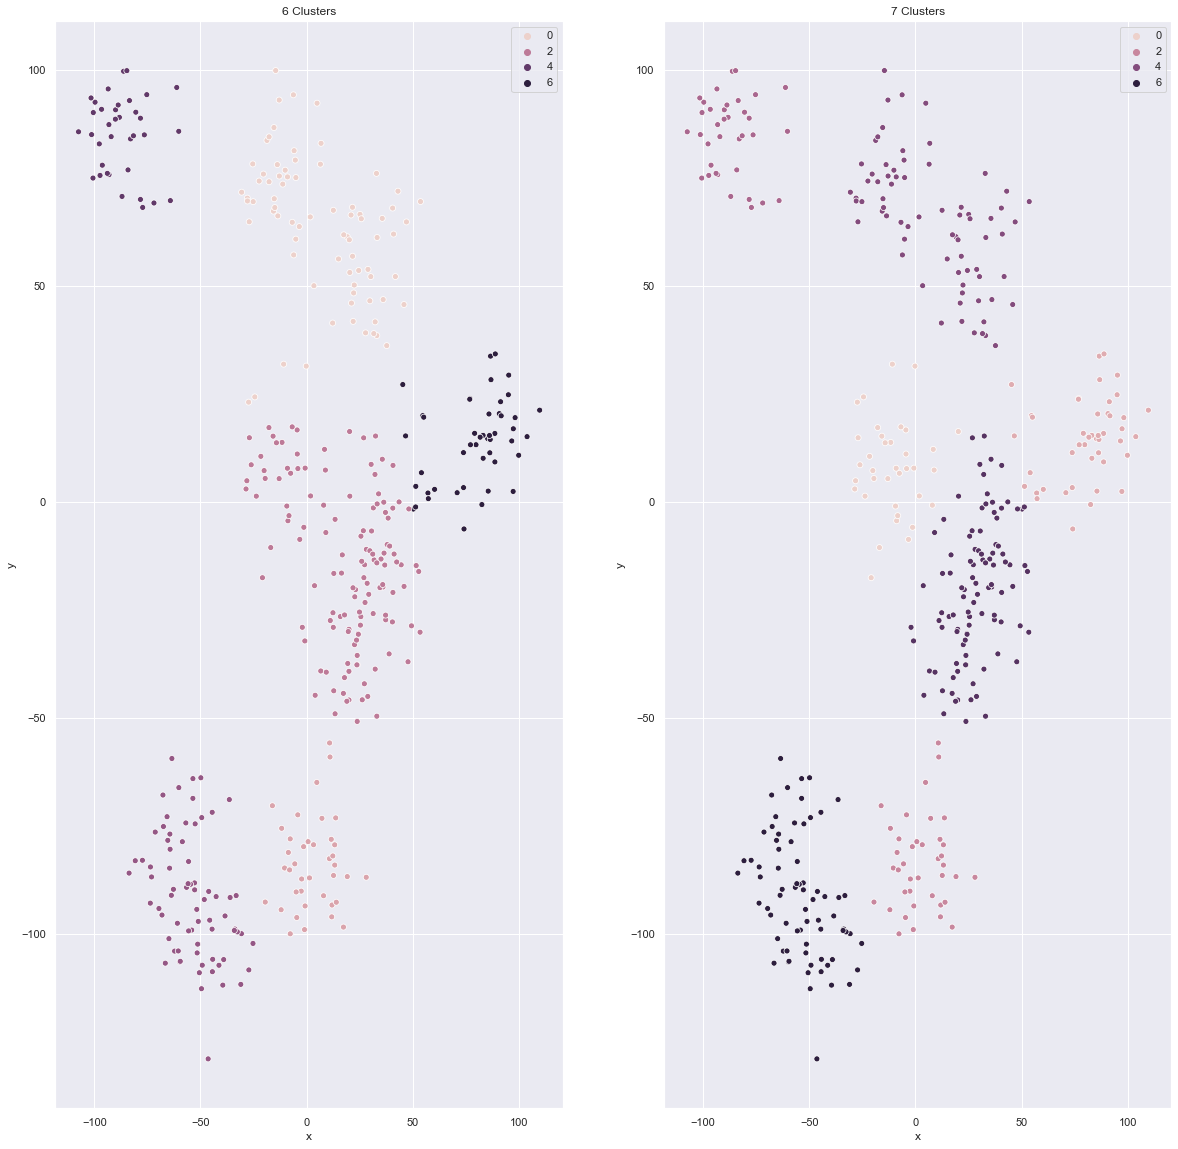

In [44]:
def label_gen(data,k):
    kmeans = KMeans(k, random_state=0).fit(data)
    return kmeans.labels_

fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data,x='x',y='y', ax=ax[0],hue=label_gen(data,6)).set_title('6 Clusters')
sns.scatterplot(data=data,x='x',y='y', ax=ax[1],hue=label_gen(data,7)).set_title('7 Clusters')
fig.show()


Nie sposób odróżnić który podział jest lepszy. W przypadku 7 klastrów podzielony został środkowy zbiór punktów wydaje się ,że ma to więcej sensu niż przypisanie prawie całego tego zbioru do jednego klastra jak dla 6. 

Metoda 2 AgglomerativeClustering z parametrem linkage='ward'
====
Do wyboru ilości klastrów wykorzystam indeks Daviesa–Bouldina.

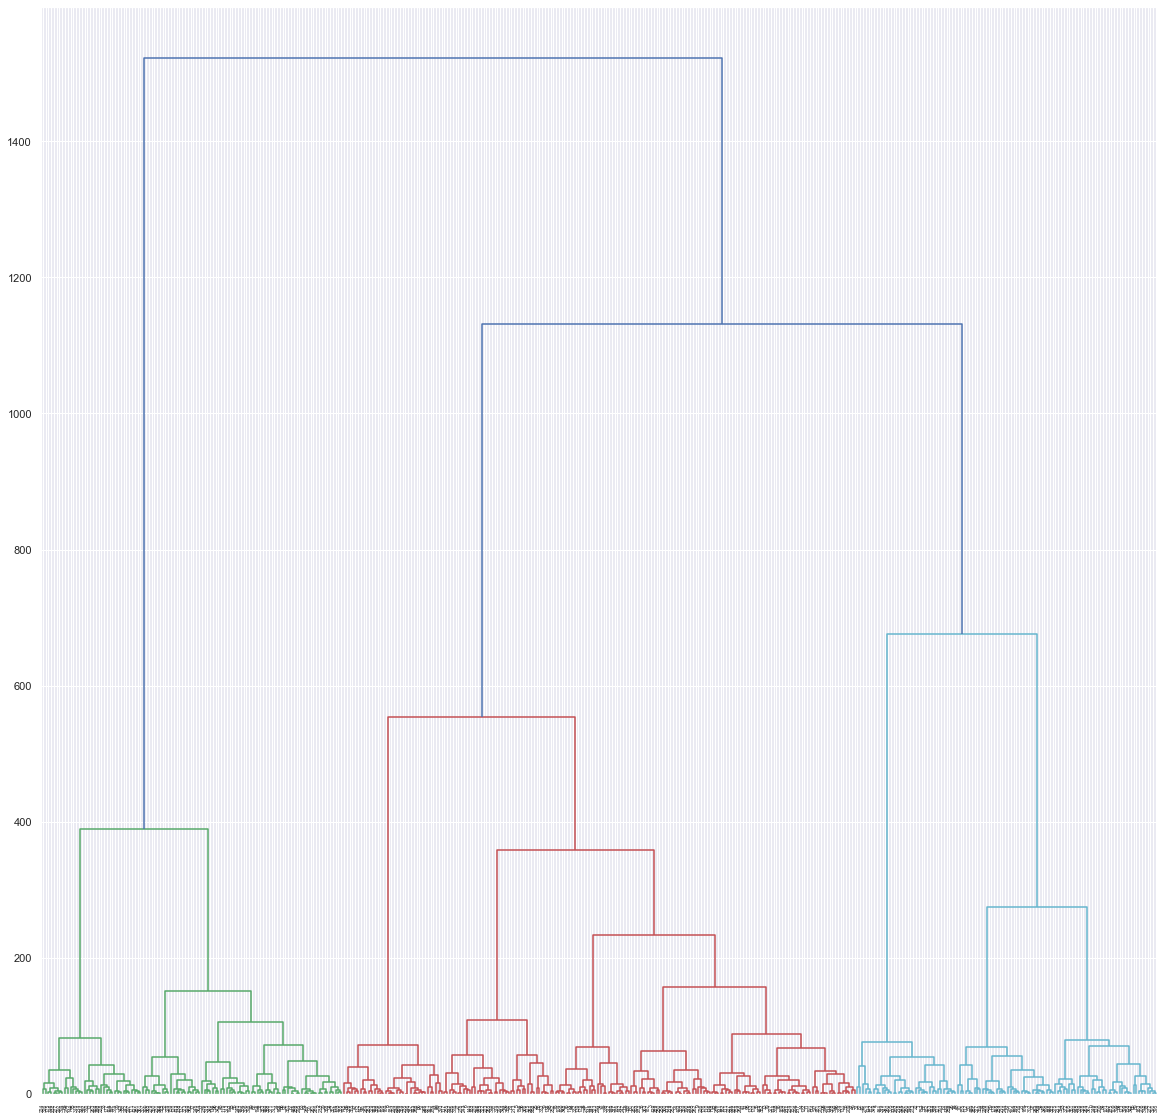

In [11]:
# Najpierw spojrzę na hierarchie 

from scipy.cluster import hierarchy


D = hierarchy.linkage(data, method='ward')
hierarchy.dendrogram(D)
plt.show()

Po wykresie można również próbować przewidzieć liczbę klatrów ale bardziej uzyteczny wydaje się do stwierdenia jak szybko uzyskujemy mała liczbę klastrów.

In [56]:
# wykorzystam wbudowaną w sklearn metodę do obliczania indeksu DB
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
def indeks_DB(startk,endk,data):
    scores = []
    for i in range(startk,endk+1):
        labels = (AgglomerativeClustering(n_clusters=i)).fit(data).labels_
        scores.append(davies_bouldin_score(data,labels))
     
    # data 
    df = pd.DataFrame({'clusters':[i for i in range(startk,endk+1)],'Indeks_DB':scores})
    
    # plot 
      #
    plt.plot(df.clusters, df.Indeks_DB, 'bx-')
    plt.xlabel('Cluster')
    plt.ylabel('DB')
    plt.title('Indeks DB ')
    plt.xticks([i for i in range(startk,endk+1)])
    plt.show()

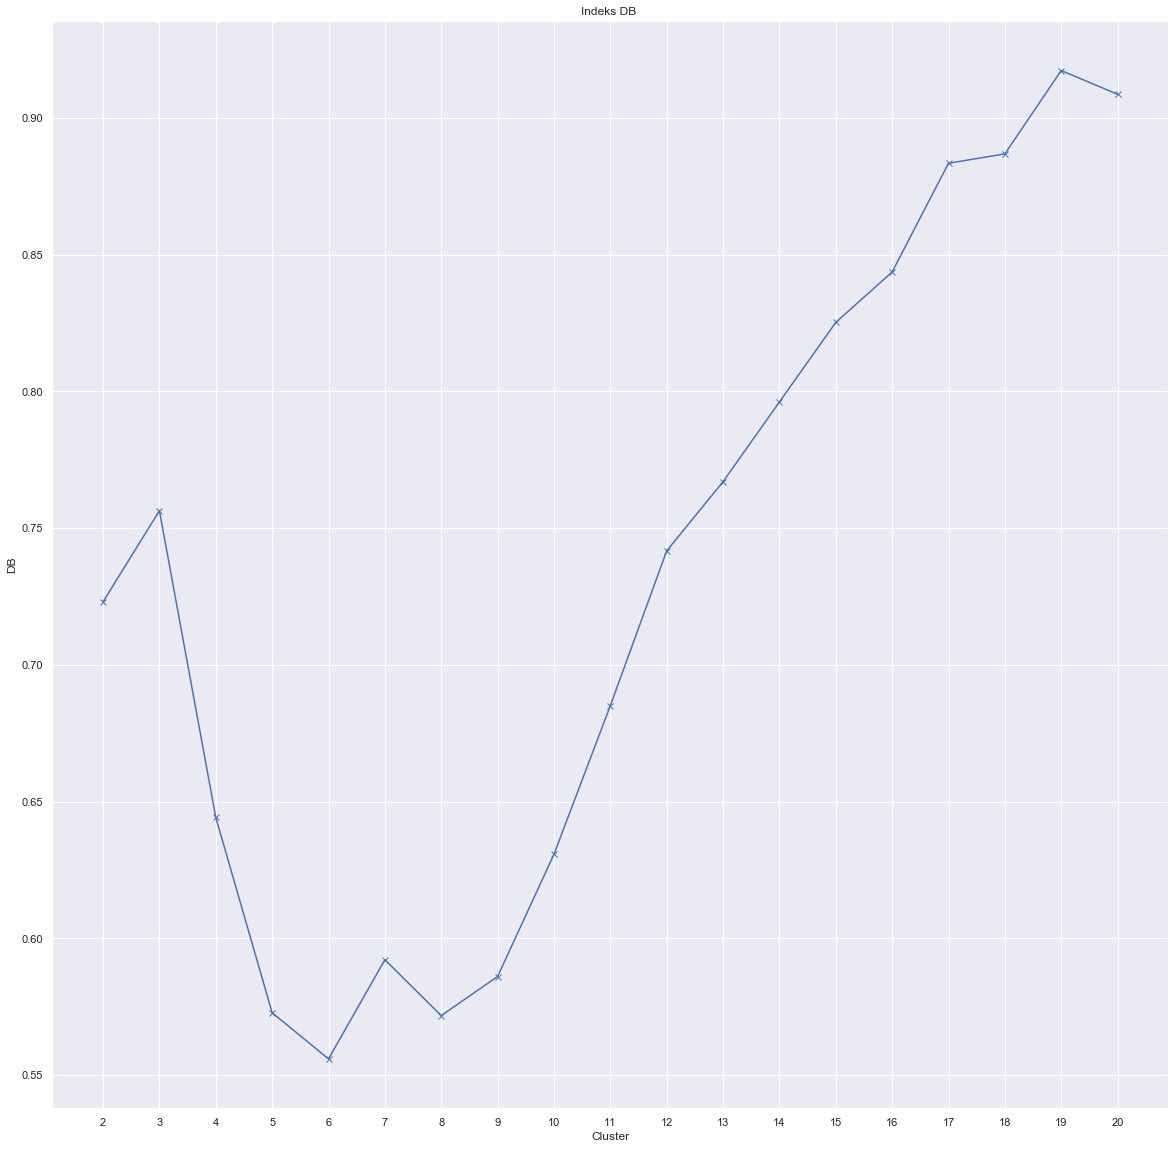

In [57]:
indeks_DB(2,20,data)

W tym wypadku algorytm jednoznacznie wskazał na 6 klastrów. Co już można uznać za przewagę nad metodą łokciową.

Text(0.5, 1.0, 'AgglomerativeClustering')

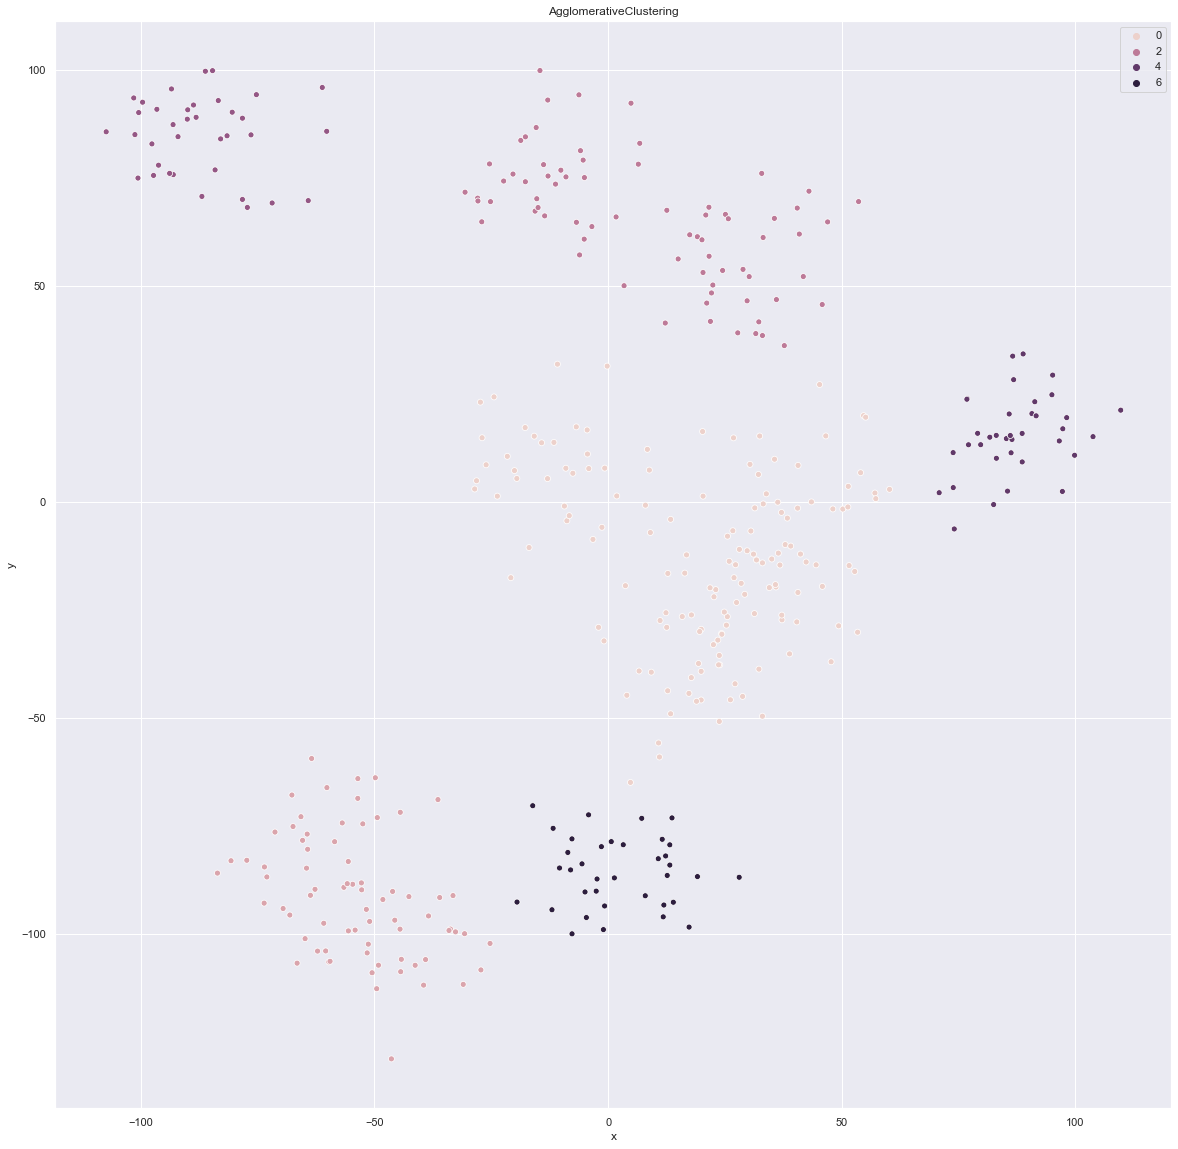

In [59]:
sns.scatterplot(data=data,x='x',y='y',hue=(AgglomerativeClustering(n_clusters=6)).fit(data).labels_).set_title('AgglomerativeClustering')

Wynik jest nie znacznie inny niż w przypadku Kmeans róznicę widać na przykład w środkowym klastrze który wydaje się sensowniej przypisany. Dodatkowo użyta metoda wyboru liczby klastrów wydaje się wygodniejsza niż pierwsza ale może to być specyficzne dla tego przypadku. Nie można też jednoznacznie wybrać jednego podziału (metody) poniważ jego ocena zawsze będzie subiektywna.